In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

## **데이터셋 로드**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/spp_project/mbti_concat.csv')

## **데이터 전처리**

In [4]:
data

,Unnamed: 0,posts,type
0,0,know intj tool use interaction people excuse a...,INTJ
1,1,rap music ehh opp yeah know valid well know fa...,INTJ
2,2,preferably p hd low except wew lad video p min...,INTJ
3,3,drink like wish could drink red wine give head...,INTJ
4,4,space program ah bad deal meing freelance max ...,INTJ
...,...,...,...
114737,114737,'https://www.youtube.com/watch?v=t8edHB_h908||...,ISFP
114738,114738,'So...if this thread already exists someplace ...,ENFP
114739,114739,'So many questions when i do these things. I ...,INTP
114740,114740,'I am very conflicted right now when it comes ...,INFP


In [5]:
# 불필요한 컬럼 제거
data = data.drop(['Unnamed: 0'], axis=1)

In [6]:
data

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
114737,'https://www.youtube.com/watch?v=t8edHB_h908||...,ISFP
114738,'So...if this thread already exists someplace ...,ENFP
114739,'So many questions when i do these things. I ...,INTP
114740,'I am very conflicted right now when it comes ...,INFP


## **불용어 제거**

In [10]:
# 전처리 함수에서 사용할 contractions 생성
contractions = {"'cause": 'because',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "ain't": 'is not',
 "aren't": 'are not',
 "can't": 'cannot',
 "could've": 'could have',
 "couldn't": 'could not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he would',
 "he'll": 'he will',
 "he's": 'he is',
 "here's": 'here is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how is',
 "i'd": 'i would',
 "i'd've": 'i would have',
 "i'll": 'i will',
 "i'll've": 'i will have',
 "i'm": 'i am',
 "i've": 'i have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'd've": 'it would have',
 "it'll": 'it will',
 "it'll've": 'it will have',
 "it's": 'it is',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'must have',
 "mustn't": 'must not',
 "mustn't've": 'must not have',
 "needn't": 'need not',
 "needn't've": 'need not have',
 "o'clock": 'of the clock',
 "oughtn't": 'ought not',
 "oughtn't've": 'ought not have',
 "sha'n't": 'shall not',
 "shan't": 'shall not',
 "shan't've": 'shall not have',
 "she'd": 'she would',
 "she'd've": 'she would have',
 "she'll": 'she will',
 "she'll've": 'she will have',
 "she's": 'she is',
 "should've": 'should have',
 "shouldn't": 'should not',
 "shouldn't've": 'should not have',
 "so's": 'so as',
 "so've": 'so have',
 "that'd": 'that would',
 "that'd've": 'that would have',
 "that's": 'that is',
 "there'd": 'there would',
 "there'd've": 'there would have',
 "there's": 'there is',
 "they'd": 'they would',
 "they'd've": 'they would have',
 "they'll": 'they will',
 "they'll've": 'they will have',
 "they're": 'they are',
 "they've": 'they have',
 "this's": 'this is',
 "to've": 'to have',
 "wasn't": 'was not',
 "we'd": 'we would',
 "we'd've": 'we would have',
 "we'll": 'we will',
 "we'll've": 'we will have',
 "we're": 'we are',
 "we've": 'we have',
 "weren't": 'were not',
 "what'll": 'what will',
 "what'll've": 'what will have',
 "what're": 'what are',
 "what's": 'what is',
 "what've": 'what have',
 "when's": 'when is',
 "when've": 'when have',
 "where'd": 'where did',
 "where's": 'where is',
 "where've": 'where have',
 "who'll": 'who will',
 "who'll've": 'who will have',
 "who's": 'who is',
 "who've": 'who have',
 "why's": 'why is',
 "why've": 'why have',
 "will've": 'will have',
 "won't": 'will not',
 "won't've": 'will not have',
 "would've": 'would have',
 "wouldn't": 'would not',
 "wouldn't've": 'would not have',
 "y'all": 'you all',
 "y'all'd": 'you all would',
 "y'all'd've": 'you all would have',
 "y'all're": 'you all are',
 "y'all've": 'you all have',
 "you'd": 'you would',
 "you'd've": 'you would have',
 "you'll": 'you will',
 "you'll've": 'you will have',
 "you're": 'you are',
 "you've": 'you have'}

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# NLTK의 불용어
stop_words = set(stopwords.words('english'))
print('불용어 개수 :', len(stop_words))
print(stop_words)

불용어 개수 : 179
{'should', 'on', 'during', 'or', 'few', 'an', 'over', 't', 'these', "won't", 'up', 'most', 'she', "wouldn't", 'shan', 'to', 'had', 'some', 're', 'aren', 'hadn', 'themselves', 'his', 'will', 'in', 'don', 'your', 'has', 'why', 'of', 'by', 'my', 'hasn', "isn't", 'such', 'mightn', 'won', 'too', 'down', "weren't", 'have', 'further', 'only', 'through', 'this', 'haven', 'were', 'after', 'our', 'off', "mustn't", 'that', 'am', 'how', 'above', 'whom', 'under', 'doesn', 'being', 'o', 'do', 'as', 'myself', 'was', 'here', 'any', 'between', 've', 'not', 'y', 'them', 'very', 'didn', 'him', "you're", 'and', 'at', 'itself', "she's", 'yours', 'there', 'ourselves', 'they', 'into', 'who', 'out', 'm', 'can', "should've", 'wouldn', 'weren', 'their', 'again', "needn't", 'is', 'those', 'yourself', 'if', 'than', 'where', 'needn', 'because', 'did', 'before', "shan't", 'theirs', 'hers', 'shouldn', "hadn't", 'when', "you've", "you'll", 'having', 's', 'but', 'd', 'while', 'does', 'more', "haven't", 'm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
import re
from bs4 import BeautifulSoup

# 전처리 함수
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = re.sub(r'https?:\/\/.*?[\s+]', '', sentence) # Links 제거
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열  제거 Ex) my friend(yugyeong) -> my friend
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) yugyeong's -> yugyeong
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm -> umm

    pers_types = ['infp' ,'infj', 'intp', 'intj', 'istp', 'isfp', 'isfj','istp', 'entp', 'enfp', 'entj', 'enfj', 'estp', 'esfp' ,'esfj' ,'estj']
    for types in pers_types:
      sentence = sentence.replace(types, '')

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [42]:
# posts 열 전처리
clean_posts = []
for s in data['posts']:
    clean_posts.append(preprocess_sentence(s))
clean_posts[:5]

['know tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low sweat really go

In [43]:
data['posts'] = clean_posts

In [44]:
# 전처리 진행과정에서 결측치 생성 여부 확인
print(data.isnull().sum())

posts    0
type     0
dtype: int64


In [45]:
data

,posts,type
0,know tool use interaction people excuse antiso...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably hd low except wew lad video mind go...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
114737,always think cats fi doms reason websites beco...,ISFP
114738,thread already exists someplace else list film...,ENFP
114739,many questions things would take purple pill p...,INTP
114740,conflicted right comes wanting children honest...,INFP


[reference] https://www.kaggle.com/code/rajshreev/mbti-personality-predictor-using-machine-learning

In [46]:
import collections
from collections import Counter

# collections 모듈의 Counter를 사용하여 posts 열에서 중복이 많은 단어 40개 출력
words = list(data["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('like', 759545),
 ('think', 640000),
 ('people', 596396),
 ('get', 560461),
 ('make', 419988),
 ('thing', 419029),
 ('know', 412179),
 ('one', 402060),
 ('feel', 394004),
 ('would', 379785),
 ('go', 377306),
 ('time', 376997),
 ('say', 368458),
 ('good', 359489),
 ('really', 354906),
 ('want', 305082),
 ('way', 281871),
 ('see', 254748),
 ('much', 249919),
 ('also', 246690),
 ('something', 243917),
 ('work', 240563),
 ('try', 227564),
 ('type', 224369),
 ('find', 222072),
 ('even', 221249),
 ('take', 219910),
 ('well', 214189),
 ('lot', 201187),
 ('friend', 199359),
 ('need', 199117),
 ('love', 189064),
 ('use', 188558),
 ('life', 182913),
 ('someone', 182827),
 ('mean', 173799),
 ('could', 170851),
 ('come', 165877),
 ('look', 162465),
 ('though', 159580)]

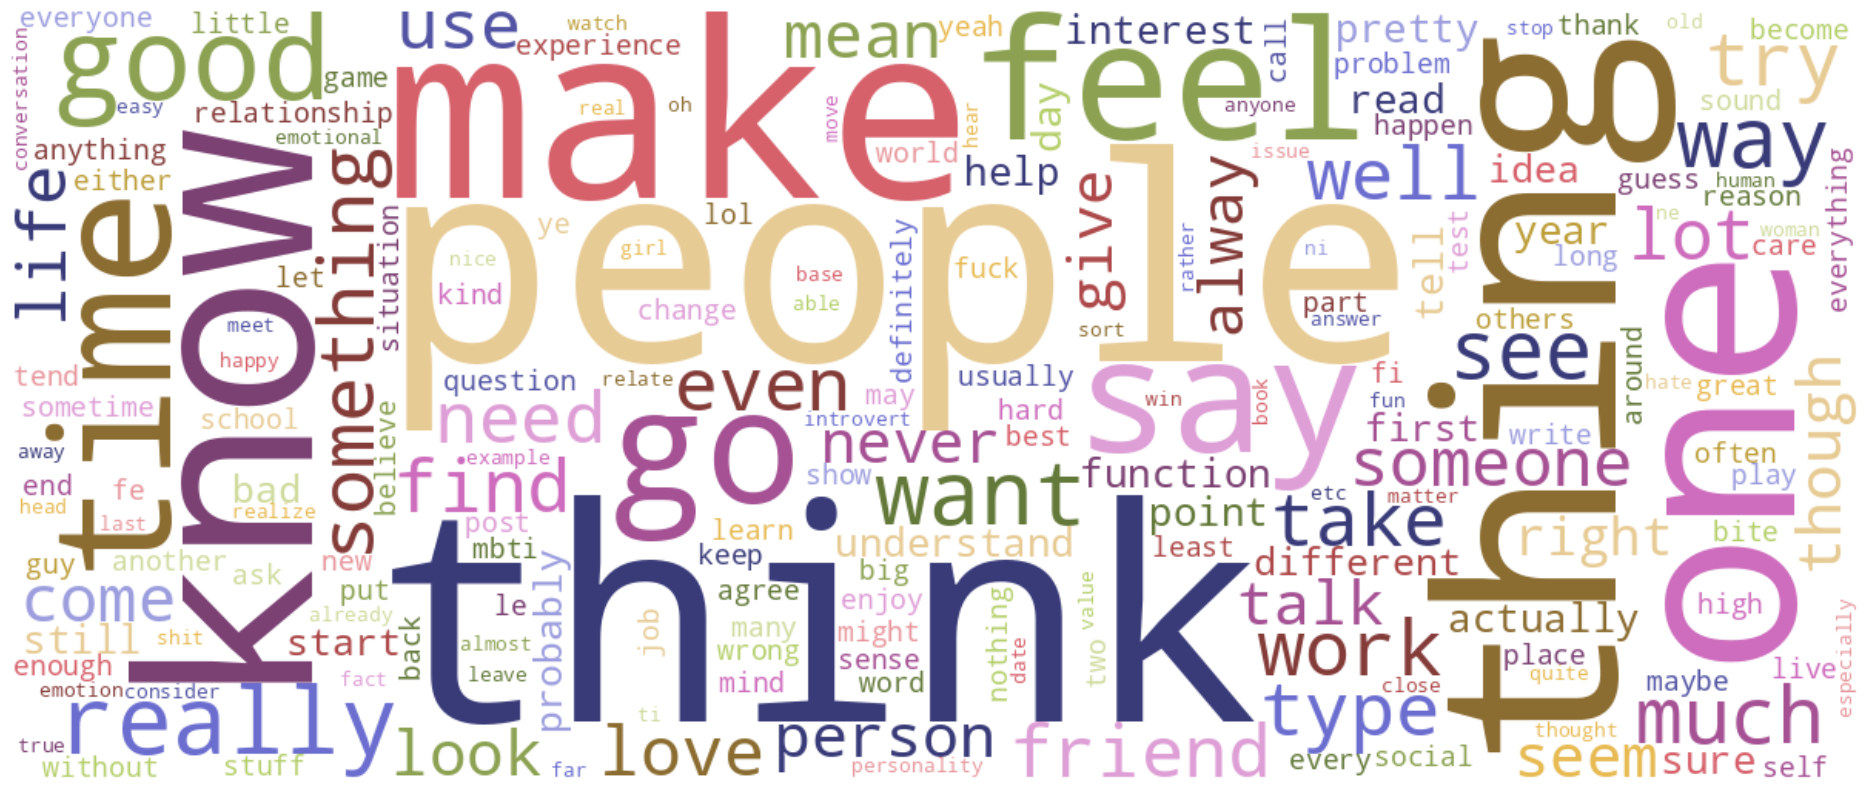

In [47]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(words))

plt.figure(figsize=(25,10))
# word cloud 생성
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

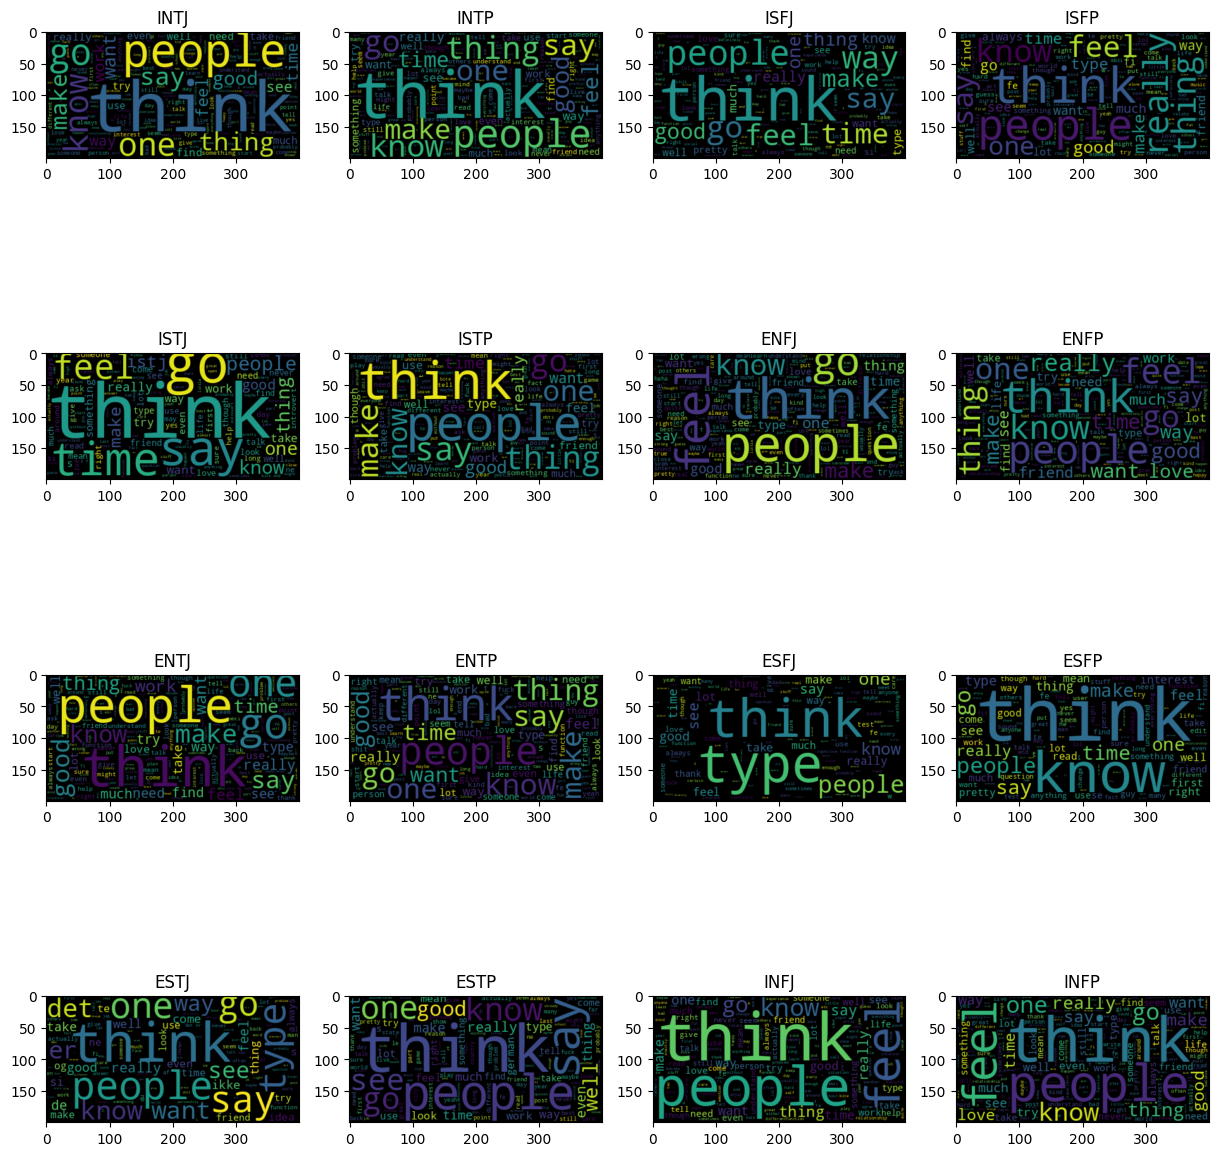

In [48]:
fig, ax = plt.subplots(len(data['type'].unique()), sharex=True, figsize=(15,len(data['type'].unique())))
k = 0
for i in data['type'].unique():
    data_4 = data[data['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(data_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

## **EDA**

In [49]:
data.head()

,posts,type
0,know tool use interaction people excuse antiso...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably hd low except wew lad video mind go...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114742 entries, 0 to 114741
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   114742 non-null  object
 1   type    114742 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [51]:
data.describe()

,posts,type
count,114742,114742
unique,114742,16
top,know tool use interaction people excuse antiso...,INTP
freq,1,26265


In [52]:
data.isnull().sum().to_frame().rename(columns={0: "Count of Missing Values"})

,Count of Missing Values
posts,0
type,0


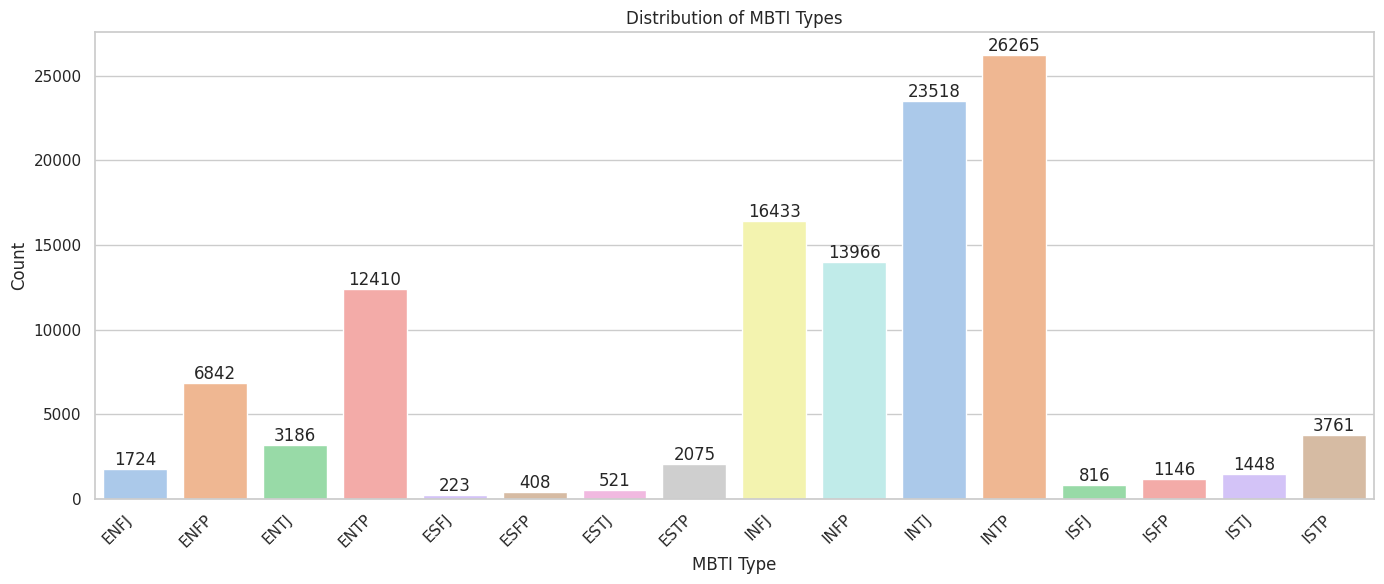

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# 스타일과 색상 설정
sns.set(style="whitegrid", palette="pastel")

# count plot 생성
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=data, x='type', order=sorted(data['type'].unique()),
                   palette="pastel")
ax.set_title('Distribution of MBTI Types')
ax.set_xlabel('MBTI Type')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.tight_layout()

plt.show()

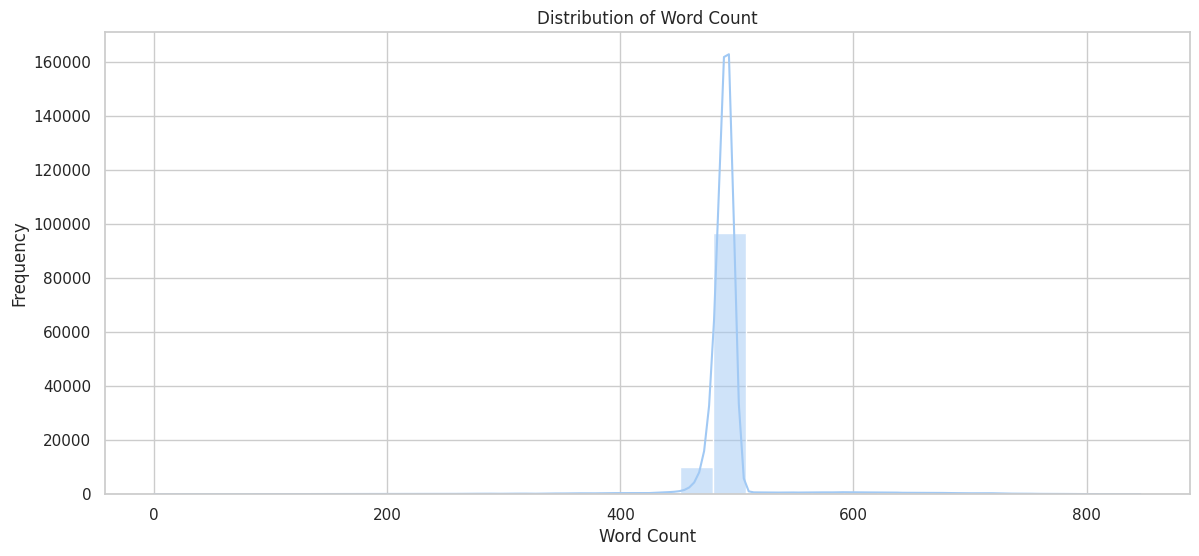

In [66]:
data['word_count'] = data['posts'].apply(lambda x: len(x.split()))

plt.figure(figsize=(14, 6))
sns.histplot(data=data, x='word_count', bins=30, kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [56]:
import plotly.express as px

# 색상 설정
color_palette = px.colors.qualitative.Pastel

# 박스 플롯 생성
fig = px.box(data, x="type", y="word_count", color="type",
             title="Word Count Distribution by MBTI Personality Type",
             category_orders={"label": sorted(data["type"].unique())},
             color_discrete_sequence=color_palette)

# 라벨 이름 설정
fig.update_xaxes(title="MBTI Personality Type", showgrid=False,
                 tickfont=dict(size=12, color="black"))
fig.update_yaxes(title="Word Count", showgrid=False,
                 tickfont=dict(size=12, color="black"))

# 타이틀 설정
fig.update_layout(title_font=dict(size=24, color="darkblue"))

fig.show()

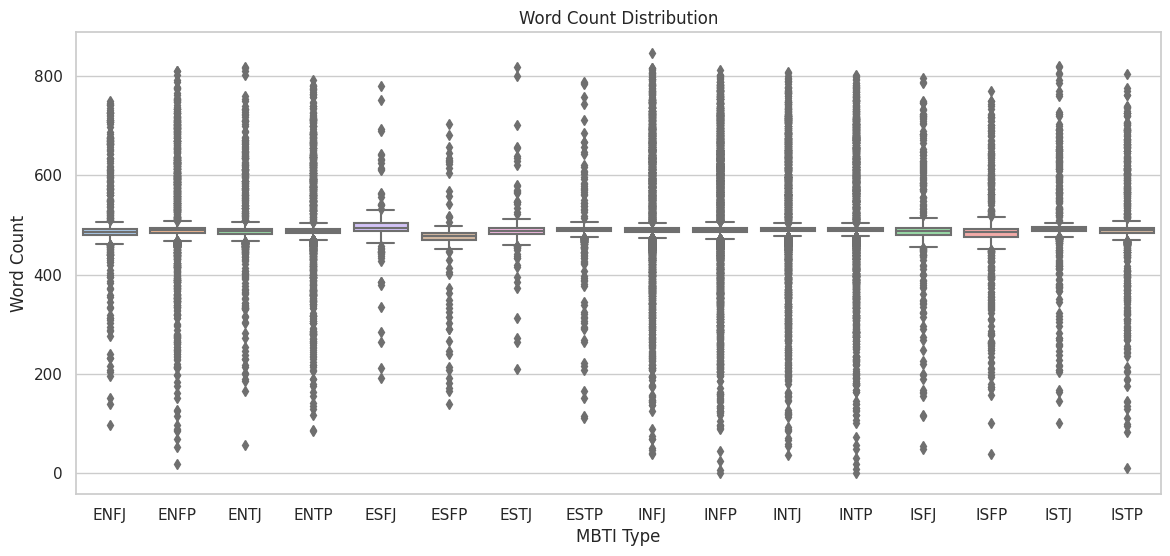

In [57]:
# 색상 설정
color_palette = sns.color_palette("pastel")

# 박스 플롯 생성
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=data, x='type', y='word_count',
                 order=sorted(data['type'].unique()),
                 palette=color_palette)
ax.set_title('Word Count Distribution')
ax.set_xlabel('MBTI Type')
ax.set_ylabel('Word Count')
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))

plt.show()

In [58]:
data

,posts,type,word_count
0,know tool use interaction people excuse antiso...,INTJ,496
1,rap music ehh opp yeah know valid well know fa...,INTJ,497
2,preferably hd low except wew lad video mind go...,INTJ,495
3,drink like wish could drink red wine give head...,INTJ,499
4,space program ah bad deal meing freelance max ...,INTJ,495
...,...,...,...
114737,always think cats fi doms reason websites beco...,ISFP,391
114738,thread already exists someplace else list film...,ENFP,276
114739,many questions things would take purple pill p...,INTP,415
114740,conflicted right comes wanting children honest...,INFP,564


In [59]:
# word_count열 제거 후, csv 파일로 저장
data = data.drop(['word_count'], axis=1)

In [63]:
data

,posts,type
0,know tool use interaction people excuse antiso...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably hd low except wew lad video mind go...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
114737,always think cats fi doms reason websites beco...,ISFP
114738,thread already exists someplace else list film...,ENFP
114739,many questions things would take purple pill p...,INTP
114740,conflicted right comes wanting children honest...,INFP


In [64]:
data.to_csv('data_result.csv')